<a href="https://colab.research.google.com/github/Nandika28/CatsAndDogs-Task/blob/master/Task2_cat_and_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import glob

# Helper libraries
import IPython.display as display
from PIL import Image
from matplotlib.image import imread
import cv2
import os.path
from os import path
import matplotlib.cm as cm

Step 1: Download the Dataset and get familiar with the organization of data.

In [ ]:
!wget --no-check-certificate \
https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip \
-O "/tmp/cats-and-dogs.zip"

import zipfile
zipped_data_path = "/tmp/cats-and-dogs.zip"
zip_ref = zipfile.ZipFile(zipped_data_path,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2020-07-09 09:21:44--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.93.0.142, 2600:1417:8000:9b2::e59, 2600:1417:8000:9ac::e59, ...
Connecting to download.microsoft.com (download.microsoft.com)|104.93.0.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M  20.5MB/s    in 40s     

2020-07-09 09:22:24 (19.5 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



Step 2: Plan how you will prepare the data to feed to your data processor. (E.g. Maybe you want
to create a new csv or excel file with all the necessary information or feed the current structure
itself to the data processor).

In [ ]:
data_dir = '/tmp/PetImages/'
CLASS_NAMES = os.listdir(data_dir)
print(CLASS_NAMES)

['Cat', 'Dog']


In [ ]:
from sklearn.model_selection import train_test_split
cat_files=os.listdir("/tmp/PetImages/Cat/")

dog_files=os.listdir("/tmp/PetImages/Dog/")

In [ ]:
cat_train, cat_test = train_test_split(cat_files, test_size = 0.2, random_state = 5)
dog_train, dog_test = train_test_split(dog_files, test_size = 0.2, random_state = 5)

In [ ]:
train_file_names = cat_train + dog_train 

test_file_names = cat_test + dog_test 

In [ ]:
np.random.shuffle(train_file_names)

In [ ]:
print("Number of train_files:" ,len(train_file_names))

print("Number of test_files:" ,len(test_file_names))

Number of train_files: 20000
Number of test_files: 5002


In [ ]:
os.mkdir("./random_dir")

Step 3: Create data processors for Training and Testing/Validation. There are many ways to
handle data - Keras Sequences, Keras Generators, TF.Data Pipelines. (Rule of Thumb: Never
show testing/validation data to your model while training).
1. In Task 1 Step 3, use image augmentation with your data processors.-----Here datagenerator is used

In [ ]:
os.mkdir("./random_dir/train")
os.mkdir("./random_dir/test")

In [ ]:
for class_name in CLASS_NAMES:
  os.mkdir(os.path.join("./random_dir/train", class_name))
  os.mkdir(os.path.join("./random_dir/test", class_name))

In [ ]:
import shutil
from os import listdir
from PIL import Image
for file in cat_train:
  if(file!='Thumbs.db' ):
    path_file=os.path.join(os.path.join(data_dir,"Cat"),file)
    if(path.exists(path_file) ):
      try:
        img = Image.open(path_file) # open the image file
        img.verify() # verify that it is, in fact an image
        dest=("./random_dir/train/Cat/"+file)
        shutil.copyfile(path_file, dest)
      except (IOError, SyntaxError) as e:   
        print('Bad file:', file) # print out the names

Bad file: 666.jpg


In [ ]:
import shutil
from os import listdir
from PIL import Image
for file in cat_test:
  if(file!='Thumbs.db' ):
    path_file=os.path.join(os.path.join(data_dir,"Cat"),file)
    if(path.exists(path_file) ):
      try:
        img = Image.open(path_file) # open the image file
        img.verify() # verify that it is, in fact an image
        dest=("./random_dir/test/Cat/"+file)
        shutil.copyfile(path_file, dest)
      except (IOError, SyntaxError) as e:
        print('Bad file:', file) # print out the names

In [ ]:
import warnings
for file in dog_train:
  if(file!='Thumbs.db' ):
    path_file=os.path.join(os.path.join(data_dir,"Dog"),file)
    if(path.exists(path_file) ):
      try:
        img = Image.open(path_file) # open the image file
        img.verify() # verify that it is, in fact an image
        dest=("./random_dir/train/Dog/"+file)
        shutil.copyfile(path_file, dest)
      except (IOError, SyntaxError) as e:
        print('Bad file:', file) # print out the name
        warnings.filterwarnings('always')

In [ ]:
for file in cat_test:
  if(file!='Thumbs.db' ):
    path_file=os.path.join(os.path.join(data_dir,"Cat"),file)
    if(path.exists(path_file) ):
      try:
        img = Image.open(path_file) # open the image file
        img.verify() # verify that it is, in fact an image
        dest=("./random_dir/test/Cat/"+file)
        shutil.copyfile(path_file, dest)
      except (IOError, SyntaxError) as e:
        print('Bad file:', file) # print out the names

Bad file: 11702.jpg


Step 4: Create your own Neural network with Convolution layers, Max Pool Layers, Dense Layers,
Dropout layers from scratch 
2. In Task 1 Step 4, use known networks (such as VGG16, Resnet, etc.) to train your AI
model.----Here keras.applications.xception.Xception has been used for predictions and generation of heat maps 

In [ ]:
# Step 2: Initialising the CNN
model = Sequential()

# Step 3: Convolution
model.add(Conv2D(32, (3, 3), input_shape = (50, 50, 3), activation = 'relu'))

# Step 4: Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))

# Step 5: Second convolutional layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Step 6: Flattening
model.add(Flatten())

# Step 7: Full connection
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

# Step 8: Compiling the CNN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


Step 5: Train your model and measure the performance of your neural network and document it.
Performance includes – Accuracy, loss other metrics of measurement for Train, Val, Test, Size of
the model, Time taken for forward Path (Inference Time).

In [ ]:
# Step 9: ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

Using TensorFlow backend.


In [ ]:
# Step 10: Load the training Set
dir="./random_dir/train"
training_set = train_datagen.flow_from_directory(dir,
                                                 target_size = (50, 50),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 19997 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
dir="./random_dir/test"
testing_set = test_datagen.flow_from_directory(dir,
                                                 target_size = (50, 50),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 5001 images belonging to 2 classes.


In [ ]:
import warnings
history = model.fit_generator(
    training_set,
    steps_per_epoch=19996 // batch_size,
    epochs=epochs,
    validation_data=testing_set,
    validation_steps=5002 // batch_size
)
warnings.filterwarnings('always')

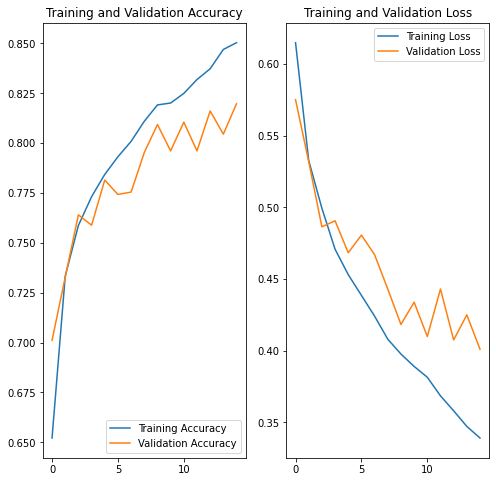

In [ ]:
#visualising training results
acc_train = history.history['accuracy']
acc_test = history.history['val_accuracy']

loss_train=history.history['loss']
loss_test=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_train, label='Training Accuracy')
plt.plot(epochs_range, acc_test, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_train, label='Training Loss')
plt.plot(epochs_range, loss_test, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
print(cat_test[0:3])

['11941.jpg', '330.jpg', '4338.jpg']


 keras.applications.xception.Xception a built in model used for training and predictions . The above generated cnn layers are just for evaluation purposes

In [ ]:
model_builder = keras.applications.xception.Xception
img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "block14_sepconv2_act"
classifier_layer_names = [
    "avg_pool",
    "predictions",
]
img_path="./random_dir/test/Cat/330.jpg"

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3872)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               495744    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [ ]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array

In [ ]:
def make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = keras.Model(classifier_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap


40960/35363 [==================================] - 0s 0us/step
Predicted: [('n02123394', 'Persian_cat', 0.97797966)]


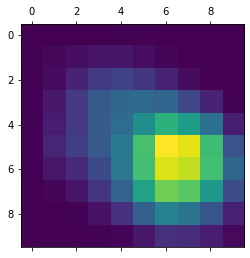

In [ ]:
# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
model = model_builder(weights="imagenet")

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap)
plt.show()

In [ ]:
# We load the original image
img = keras.preprocessing.image.load_img(img_path)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap = np.uint8(255 * heatmap)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
save_path = "catimg.jpg"
superimposed_img.save(save_path)

# Display Grad CAM
img = Image.open(save_path)

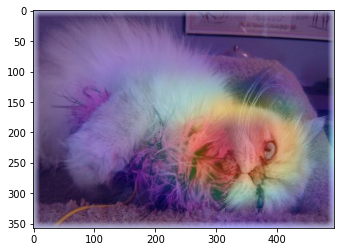

In [ ]:
plt.imshow(img)

In [ ]:
print(dog_test[2:5])

['4338.jpg', '11009.jpg', '3513.jpg']


In [ ]:
model_builder = keras.applications.xception.Xception
img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "block14_sepconv2_act"
classifier_layer_names = [
    "avg_pool",
    "predictions",
]
img_path="./random_dir/test/Dog/3513.jpg"

In [ ]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array

In [ ]:
def make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = keras.Model(classifier_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap


Predicted: [('n02093428', 'American_Staffordshire_terrier', 0.2967714)]


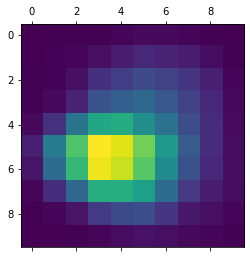

In [ ]:
# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
model = model_builder(weights="imagenet")

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap)
plt.show()

In [ ]:
# We load the original image
img = keras.preprocessing.image.load_img(img_path)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap = np.uint8(255 * heatmap)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
save_path = "dog_img.jpg"
superimposed_img.save(save_path)

# Display Grad CAM
img = Image.open(save_path)

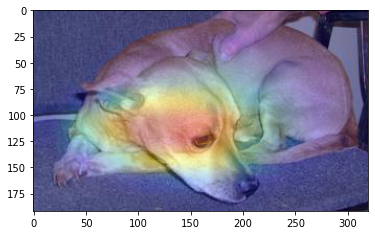

In [ ]:
plt.imshow(img)